In [1]:
import numpy as np
import tensorflow as tf

In [2]:
tf.test.is_gpu_available()

True

In [3]:
data = []# 保存样本集的列表 
for i in range(100): # 循环采样100个点 
    x = np.random.uniform(-10., 10.) # 随机采样输入x 
    # 采样高斯噪声 
    eps = np.random.normal(0., 0.01) 
    # 得到模型的输出 
    y = 1.477 * x + 0.089 + eps 
    data.append([x, y]) # 保存样本点 
data = np.array(data) # 转换为2D Numpy数组

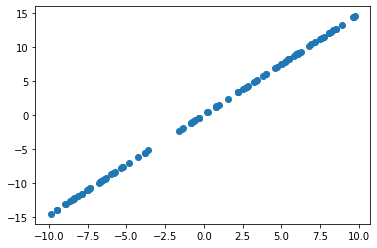

In [7]:
import matplotlib.pyplot as plt
plt.scatter(data[:,0],data[:,-1])

In [8]:
def mse(b, w, points): 
    # 根据当前的w,b参数计算均方差损失 
    totalError = 0 
    for i in range(0, len(points)): # 循环迭代所有点 
        x = points[i, 0] # 获得i号点的输入x 
        y = points[i, 1] # 获得i号点的输出y 
        # 计算差的平方，并累加 
        totalError += (y - (w * x + b)) ** 2 
    # 将累加的误差求平均，得到均方差 
    return totalError / float(len(points))

In [10]:
def step_gradient(b_current, w_current, points, lr): 
    # 计算误差函数在所有点上的导数，并更新w,b 
    b_gradient = 0 
    w_gradient = 0 
    M = float(len(points)) # 总样本数 
    for i in range(0, len(points)): 
        x = points[i, 0] 
        y = points[i, 1] 
        # 误差函数对b的导数：grad_b = 2(wx+b-y)，参考公式(2.3) 
        b_gradient += (2/M) * ((w_current * x + b_current) - y) 
        # 误差函数对w的导数：grad_w = 2(wx+b-y)*x，参考公式(2.2) 
        w_gradient += (2/M) * x * ((w_current * x + b_current) - y) 
    # 根据梯度下降算法更新 w',b',其中lr为学习率 
    new_b = b_current - (lr * b_gradient) 
    new_w = w_current - (lr * w_gradient) 
    return [new_b, new_w] 

In [11]:
def gradient_descent(points, starting_b, starting_w, lr, num_iterations): 
    # 循环更新w,b多次 
    b = starting_b # b的初始值 
    w = starting_w # w的初始值 
    # 根据梯度下降算法更新多次 
    for step in range(num_iterations): 
        # 计算梯度并更新一次 
        b, w = step_gradient(b, w, np.array(points), lr) 
        loss = mse(b, w, points) # 计算当前的均方差，用于监控训练进度 
        if step%50 == 0: # 打印误差和实时的w,b值 
            print(f"iteration:{step}, loss:{loss}, w:{w}, b:{b}") 
    return [b, w] # 返回最后一次的w,b 